# Data loading 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r'C:\Users\tiwari\Downloads\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
Y=data['Species']
X=data.drop(['Id','Species'],axis=1)
X.shape,Y.shape

((150, 4), (150,))

In [3]:
data.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [4]:
Y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Visualisation of dataset

Text(0,0.5,'Targets')

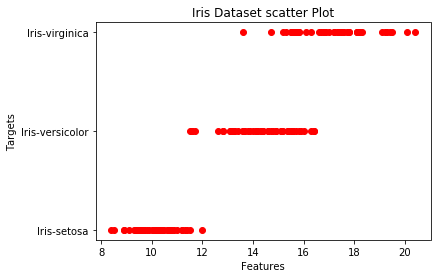

In [5]:
features=[]
x=X.values
for f in x:
    features.append([f[0] + f[1] + f[2] + f[3]])
plt.scatter(features, Y, color='red', alpha =1.0)
plt.rcParams['figure.figsize'] = [10,8]
plt.title('Iris Dataset scatter Plot')
plt.xlabel('Features')
plt.ylabel('Targets')

# Splitting data and training of model

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
from sklearn.tree import DecisionTreeClassifier
algo = DecisionTreeClassifier()
algo.fit(X_train, y_train)
print(algo.score(X_test,y_test))#score of unknown data
y_pred = algo.predict(X_test)

1.0


In [19]:
 y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

# calculating accuracy and confusion matrix

In [9]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))



[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy1.0


# Plot of predicted classes

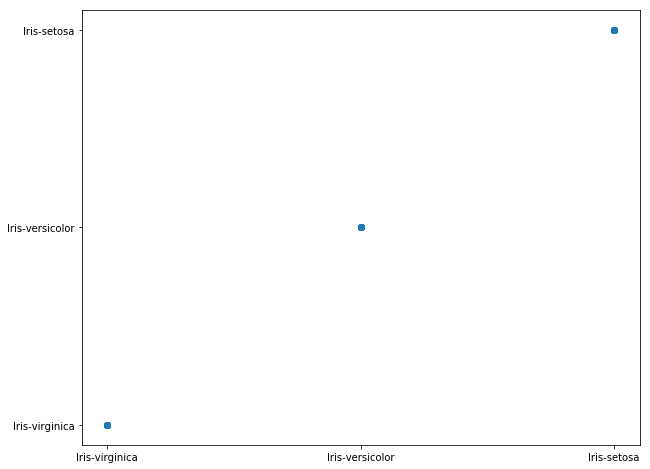

In [10]:

plt.scatter(y_test,y_pred)
plt.show()

# Heat map of confusion matrix

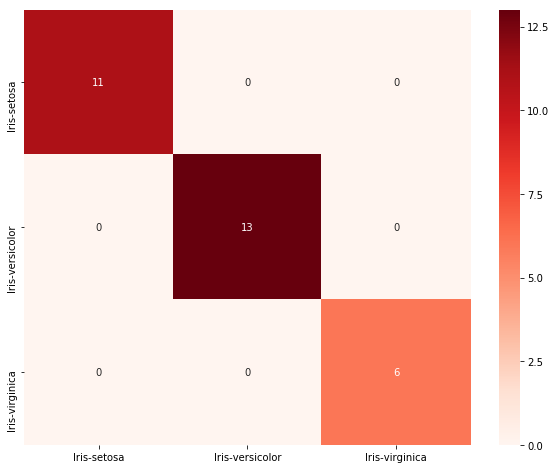

In [11]:
import seaborn as sns
sns.heatmap(cm,xticklabels=Y.unique(),yticklabels=Y.unique(),annot=True,cmap='Reds')

#  Two cells below shows the equal number class names


that is there are -->  11 iris-setosa

                13 iris-versicolor
                      
                6  iris-verginica
                      
in both test data(y_test) and predicted data(y_pred)

In [12]:
#count of species in test data
y_test.value_counts()

Iris-versicolor    13
Iris-setosa        11
Iris-virginica      6
Name: Species, dtype: int64

In [14]:
#count of species in predicted data
import numpy as np
np.unique(y_pred,return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([11, 13,  6], dtype=int64))

In [16]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

# Graphical visualisation of tree

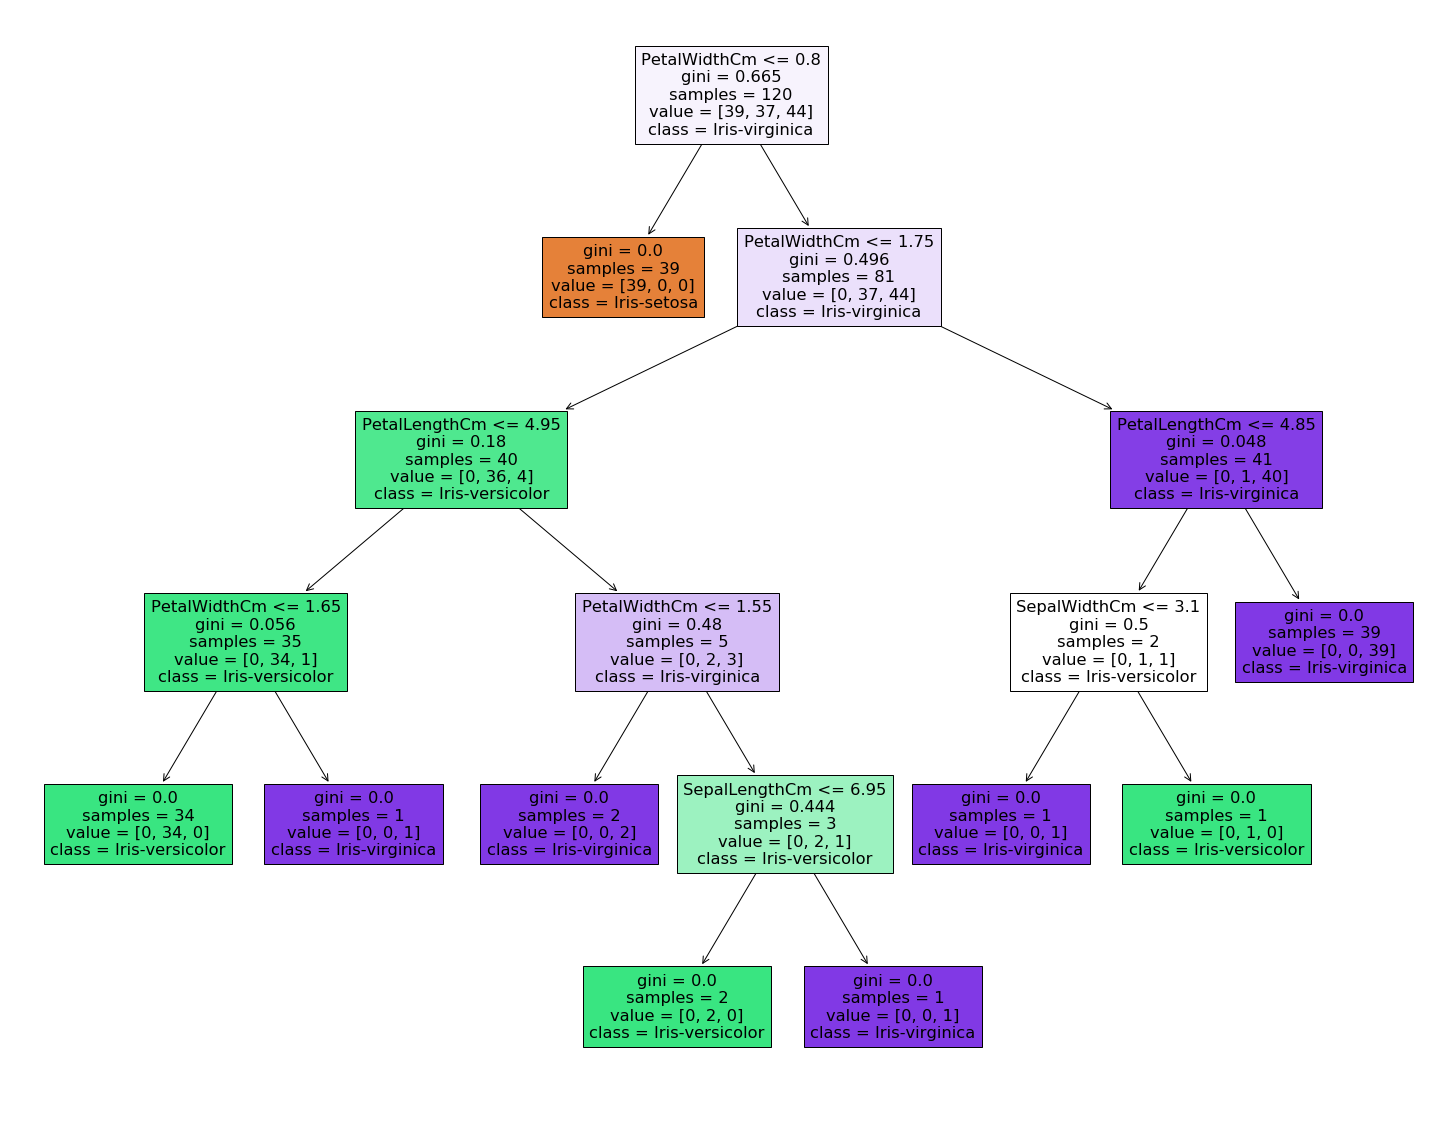

In [18]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(algo, 
                   feature_names=X.columns,  
                   class_names=Y.unique(),
                   filled=True)